In [1]:
import tensorflow as tf
from tensorflow.keras import Model, Input, metrics
from tensorflow.keras import layers 
from tensorflow.keras import optimizers
from tensorflow.keras import backend
from tensorflow.python.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import os
print os.getcwd()
from model_application.model_list import segnet_1, segnet_2, segnet_3, fast_scnn_1, fast_scnn_2
from data_processing import prepare_data

/home/tungpao0707/gcloud/Thesis


In [2]:
BATCH_SIZE= 16
INPUT_SHAPE= (256, 256, 3)
MODEL_PATH = "trained_models/"
TRAINED_MODELS=["fast_scnn_1.h5",
                "fast_scnn_2.h5", 
                "seg_resnet_1.h5",
                "seg_resnet_2.h5", 
                "segnet_1.h5", 
                "segnet_2.h5"] 

In [3]:
model_1 = segnet_1.segnet_4_encoder_decoder(input_shape=INPUT_SHAPE, batch_size=BATCH_SIZE, n_labels=2, model_summary=False)
model_1.load_weights(MODEL_PATH+TRAINED_MODELS[4])

model_2 = segnet_1.segnet_4_encoder_decoder(input_shape=INPUT_SHAPE, batch_size=BATCH_SIZE, n_labels=2, model_summary=False)
model_2.load_weights(MODEL_PATH+TRAINED_MODELS[5])

model_3 = segnet_2.segnet_resnet_v1(input_shape=INPUT_SHAPE, batch_size=BATCH_SIZE, n_labels=2, model_summary=False)
model_3.load_weights(MODEL_PATH+TRAINED_MODELS[2])

model_4 = segnet_3.segnet_resnet_v2(input_shape=INPUT_SHAPE, batch_size=BATCH_SIZE, n_labels=2, model_summary=False)
model_4.load_weights(MODEL_PATH+TRAINED_MODELS[3])

model_5 = fast_scnn_1.fast_scnn_v1(input_shape=INPUT_SHAPE, batch_size=BATCH_SIZE, n_labels=2, model_summary=False)
model_5.load_weights(MODEL_PATH+TRAINED_MODELS[0])

model_6 = fast_scnn_2.fast_scnn_v2(input_shape=INPUT_SHAPE, batch_size=BATCH_SIZE, n_labels=2, model_summary=False)
model_6.load_weights(MODEL_PATH+TRAINED_MODELS[1])



Build enceder done..
Build decoder done..
Build enceder done..
Build decoder done..
Build enceder done..
Build decoder done..
Build enceder done..
Build decoder done..


Found 1360 images belonging to 2 classes.
Found 1360 images belonging to 2 classes.


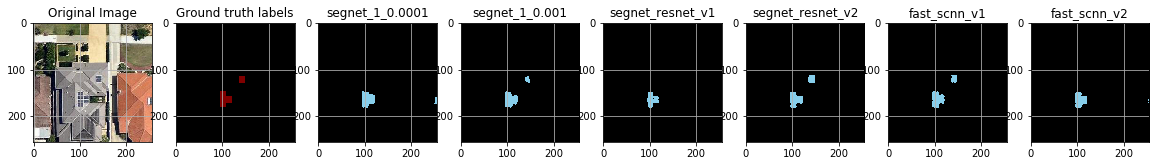

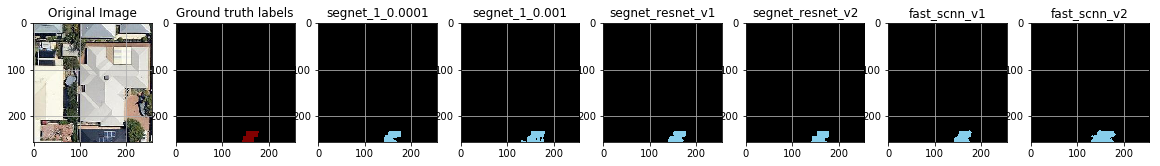

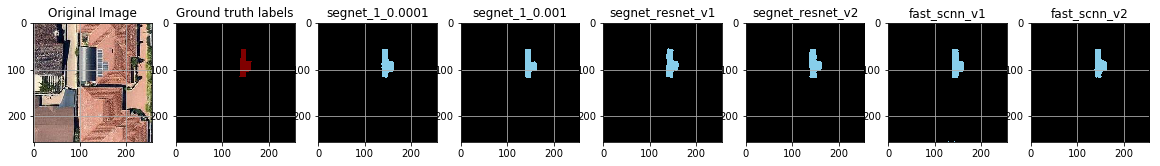

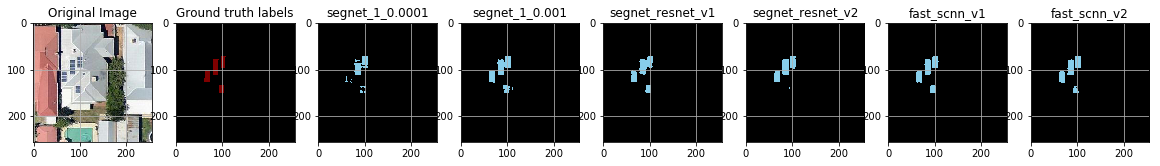

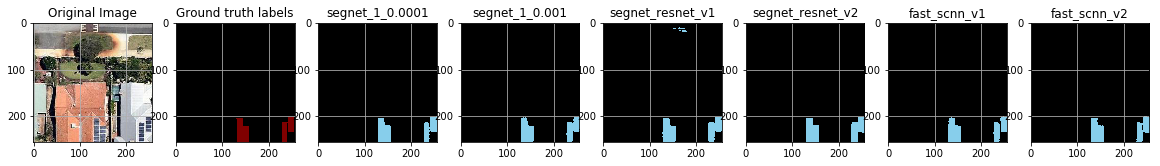

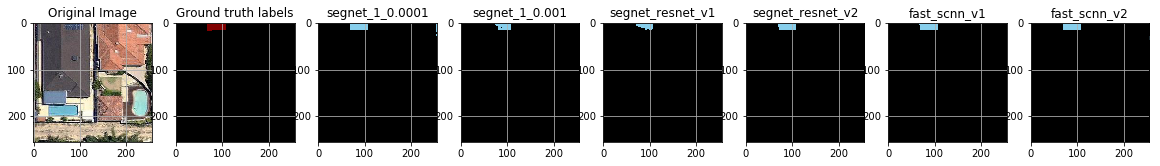

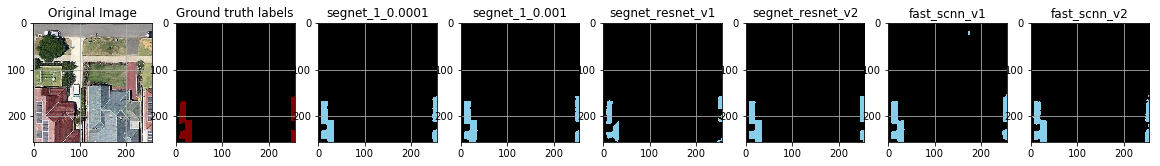

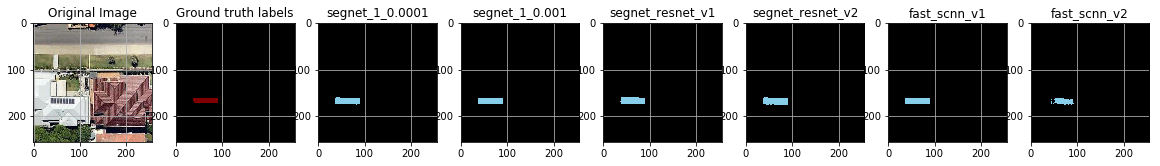

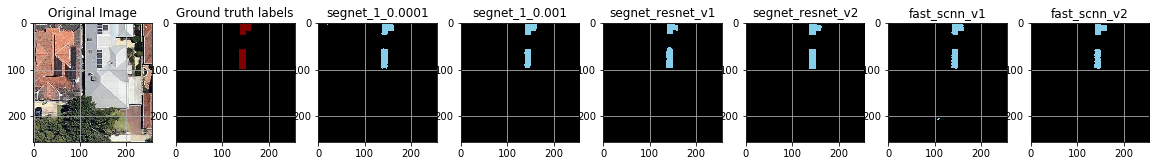

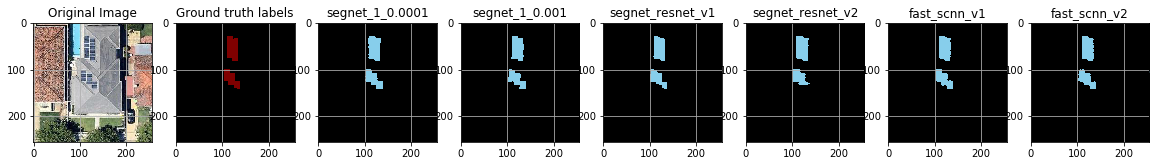

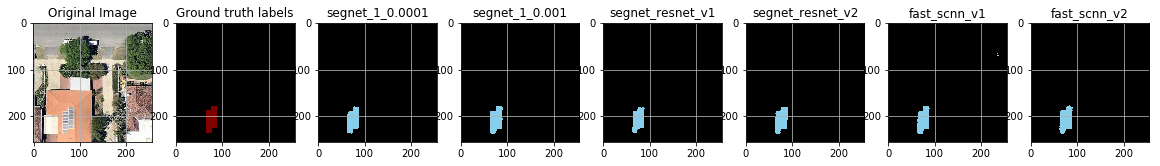

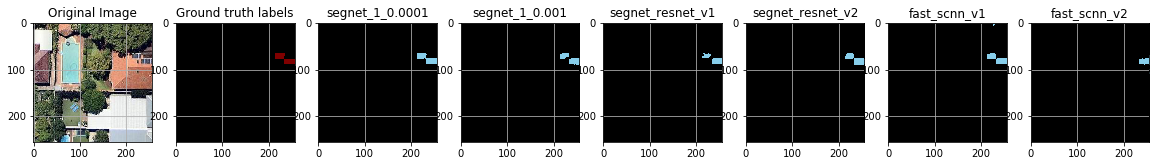

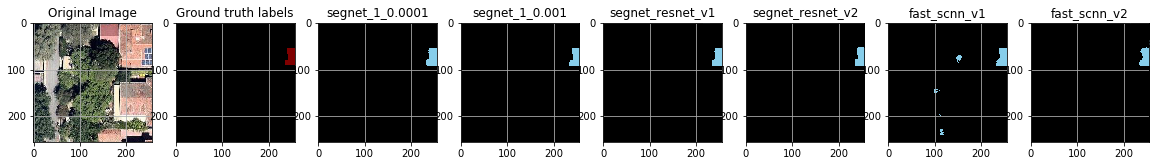

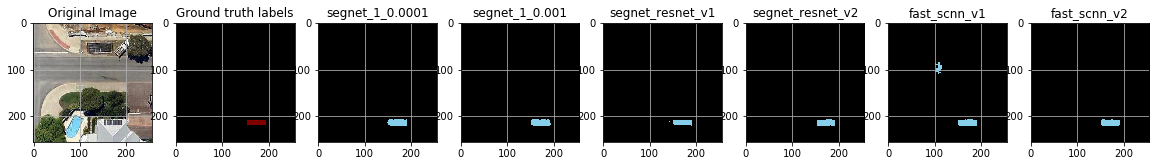

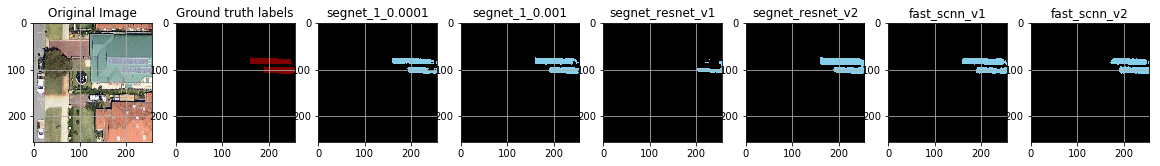

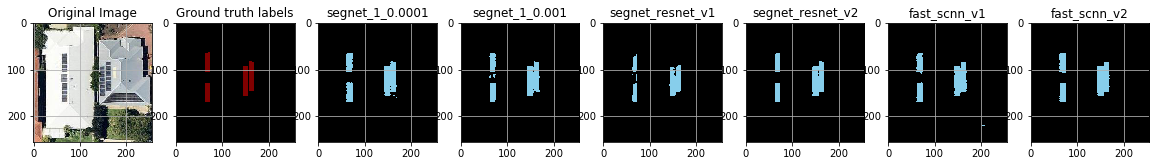

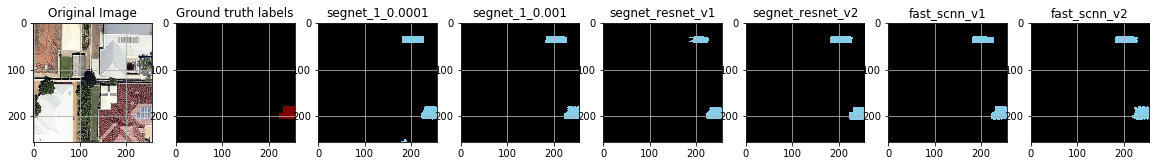

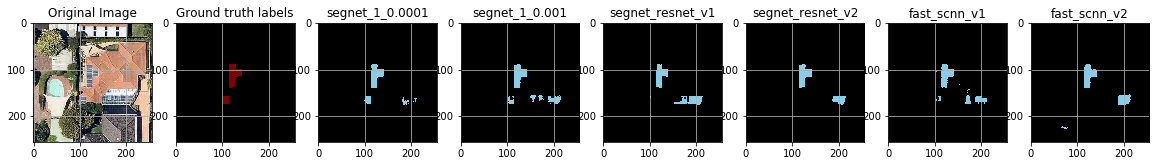

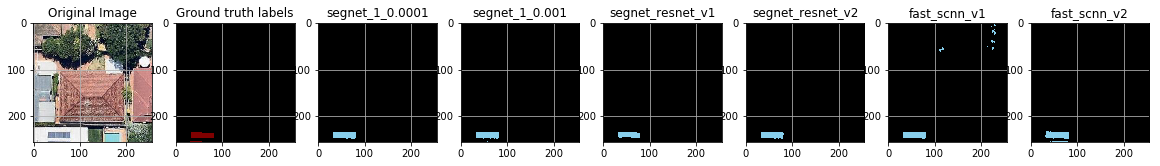

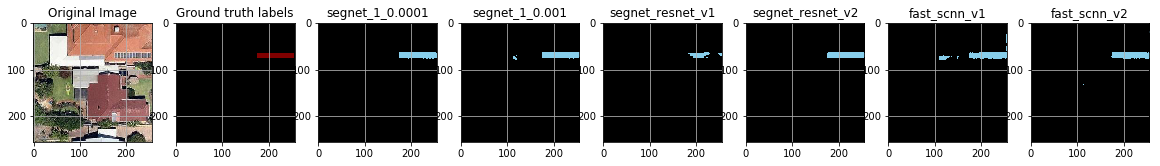

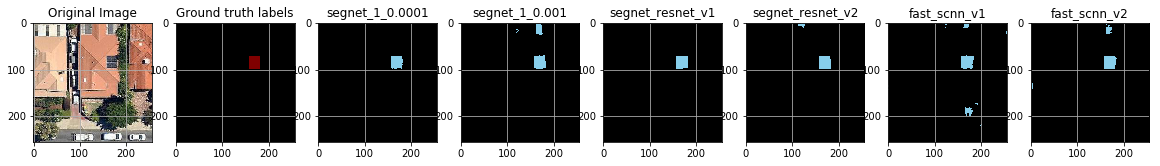

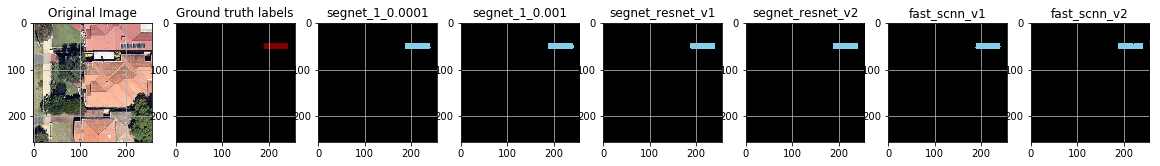

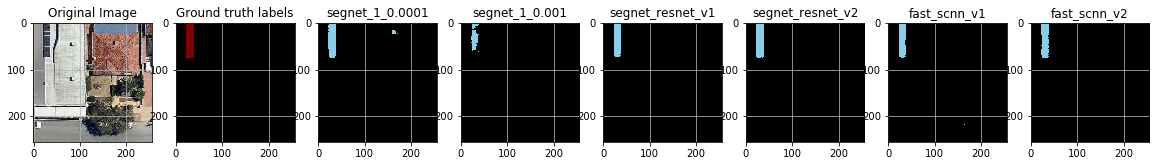

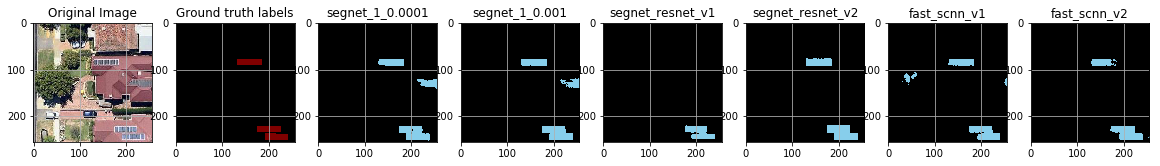

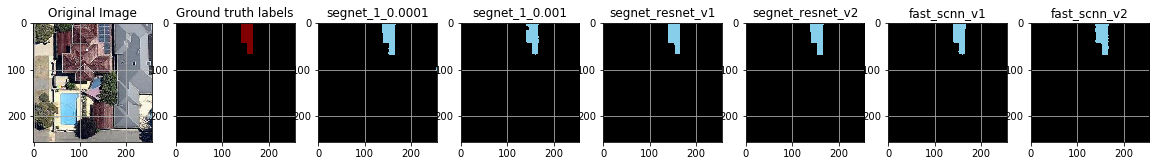

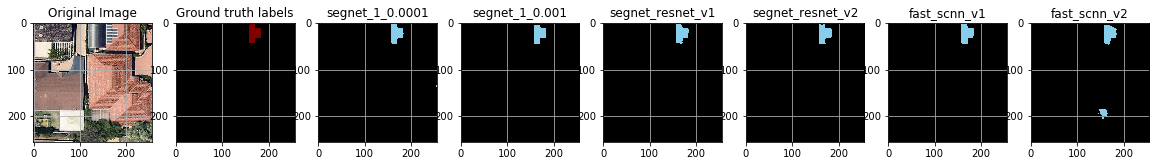

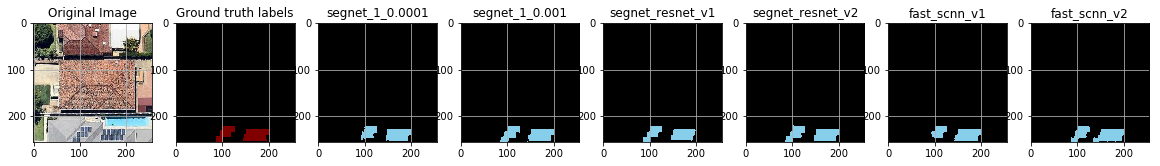

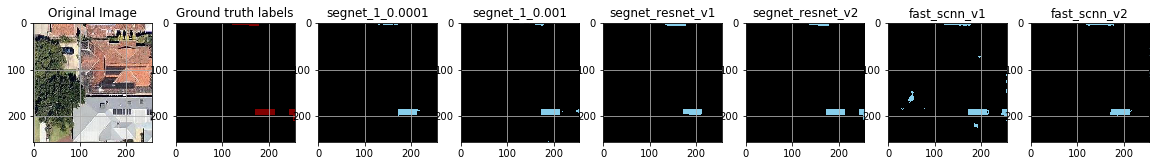

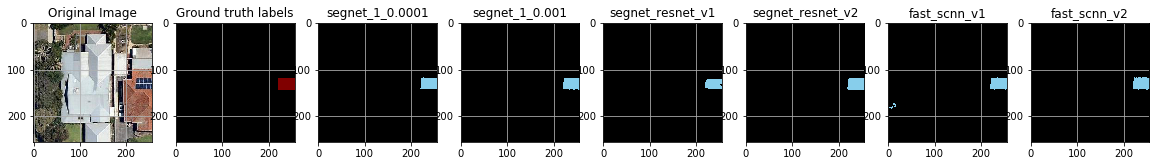

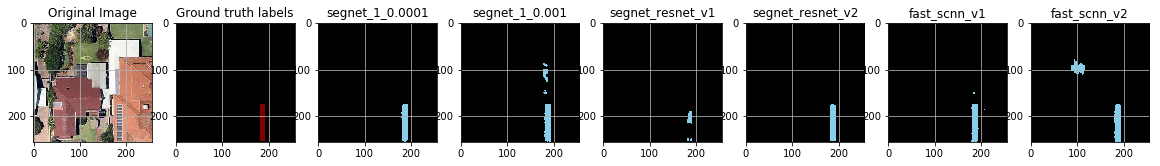

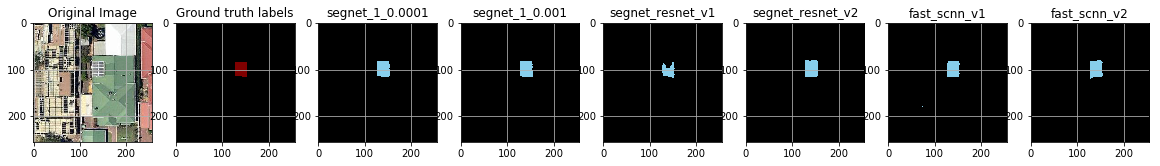

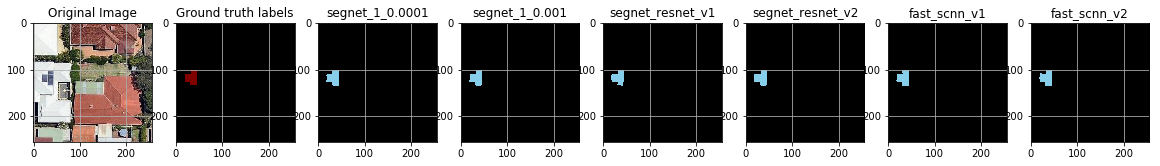

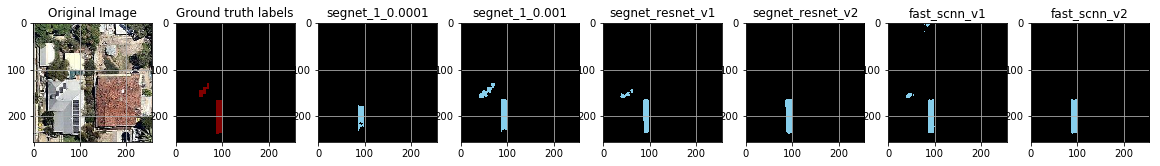

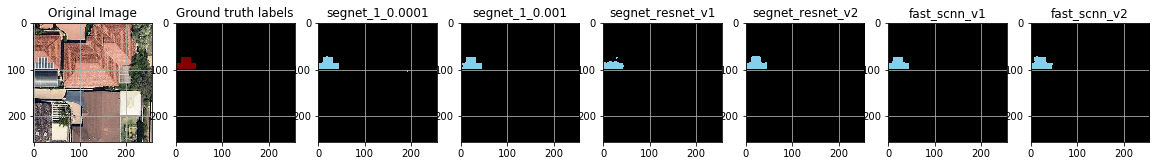

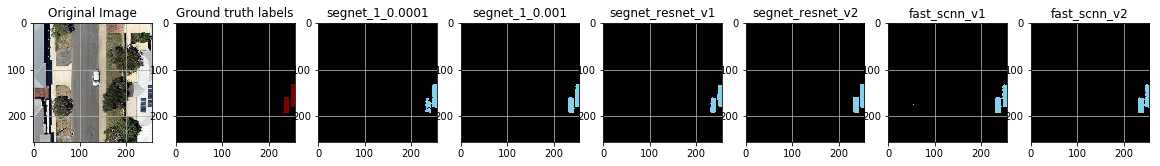

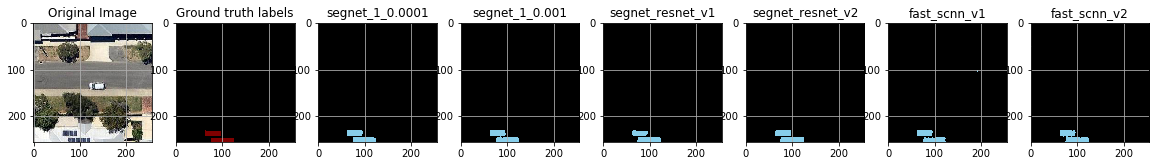

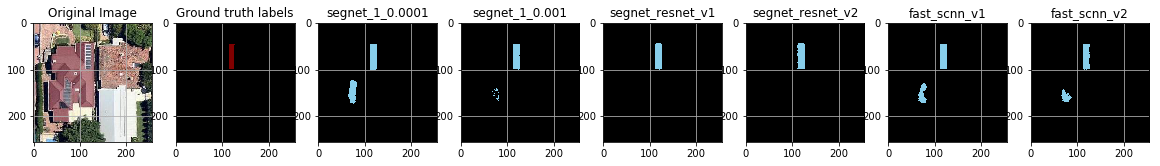

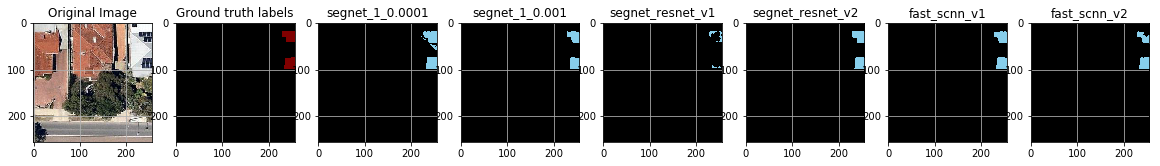

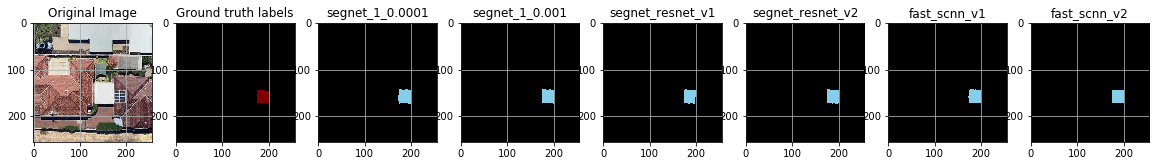

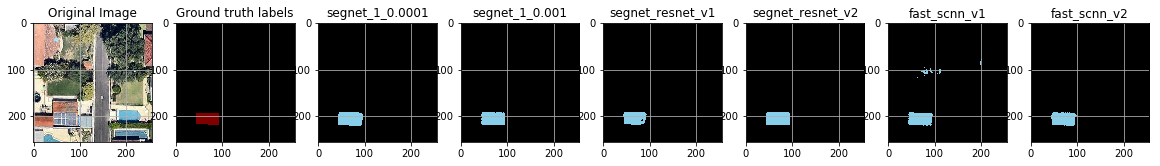

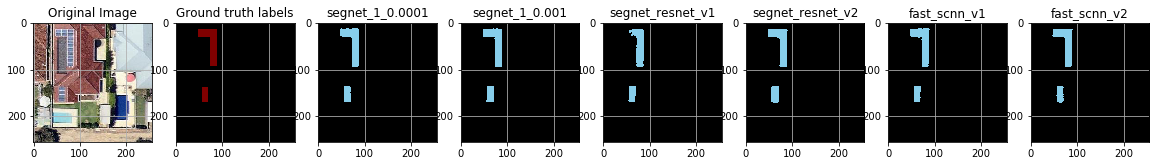

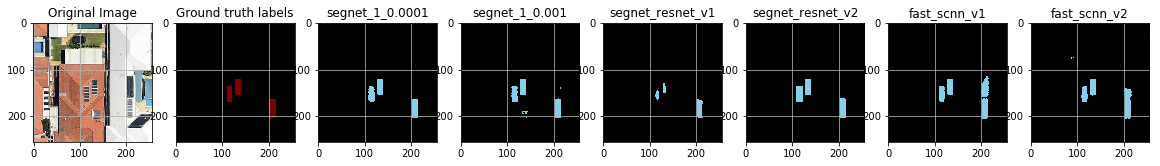

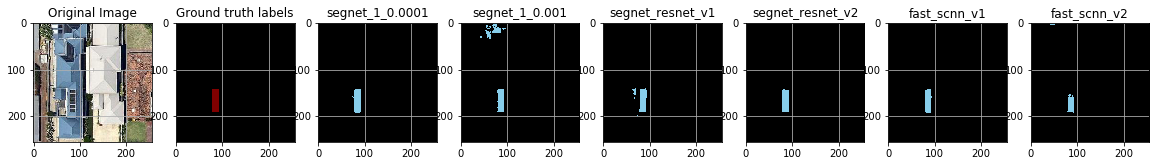

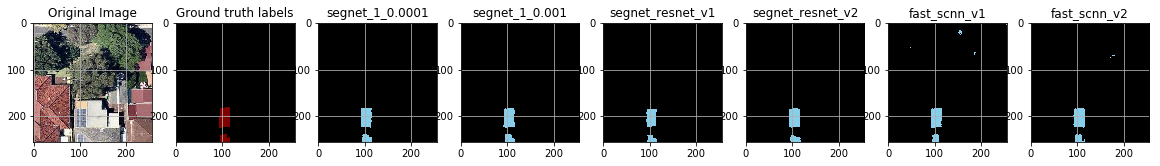

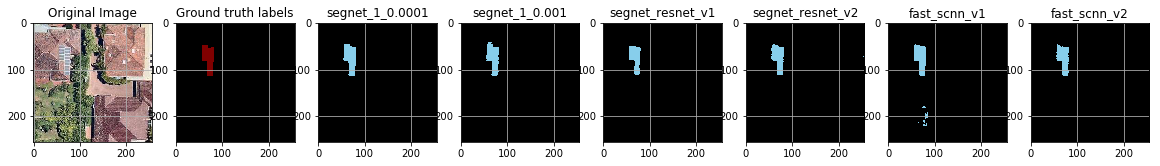

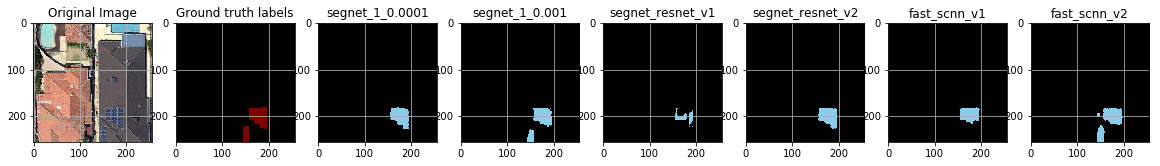

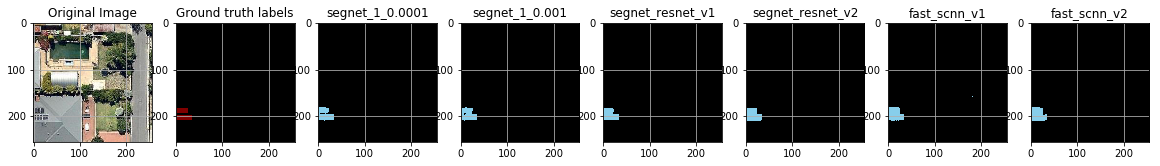

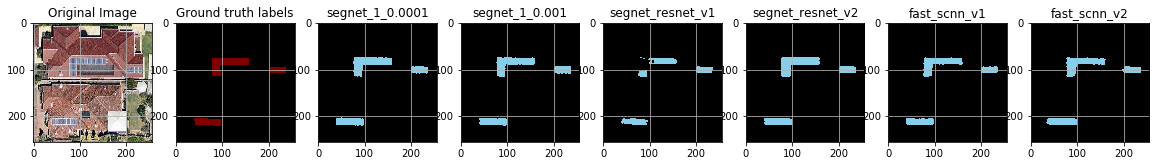

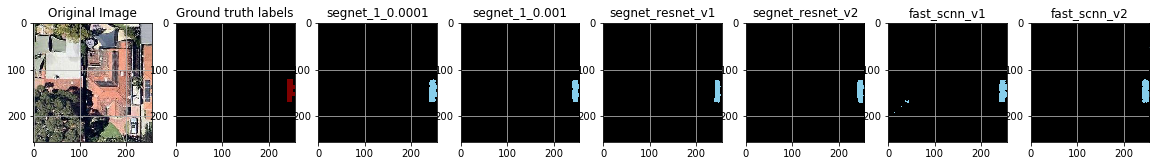

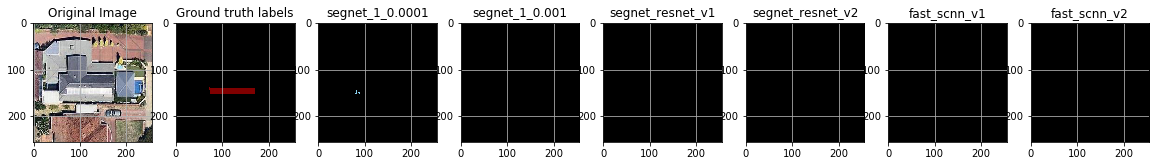

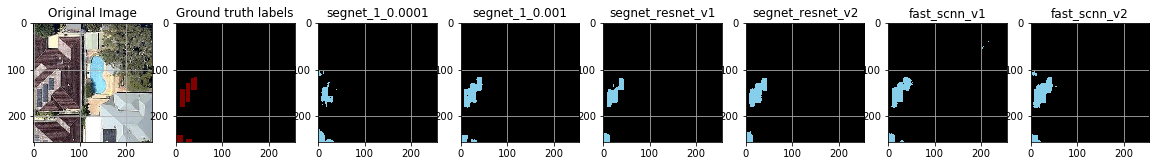

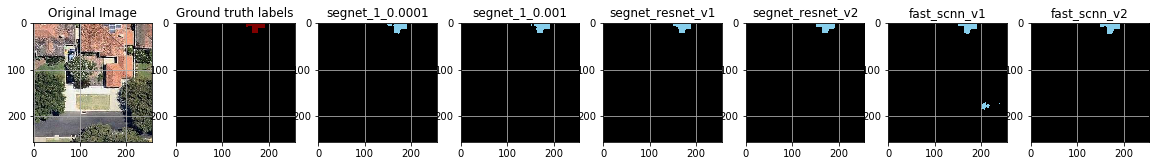

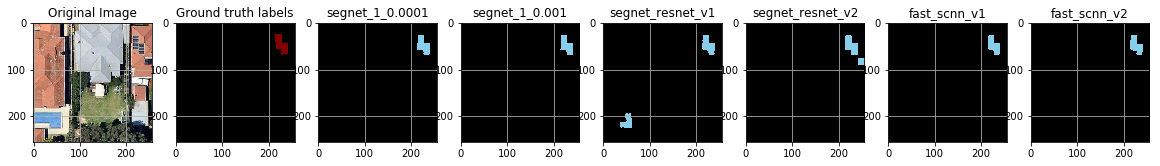

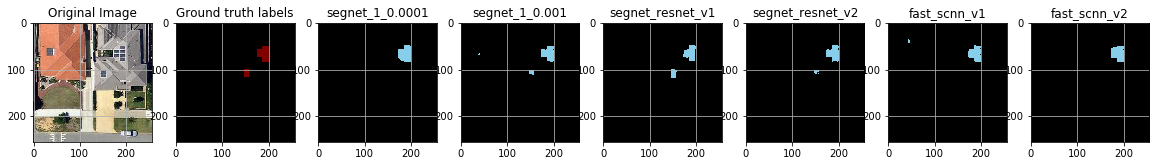

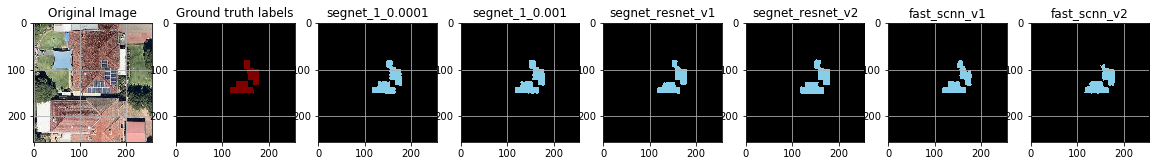

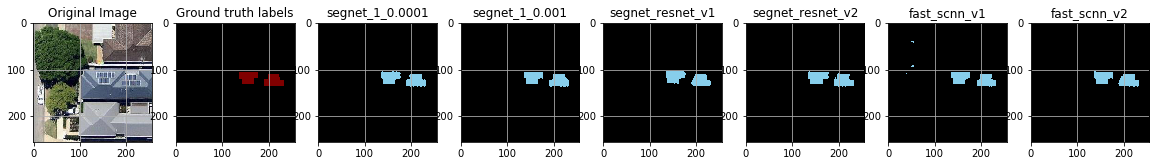

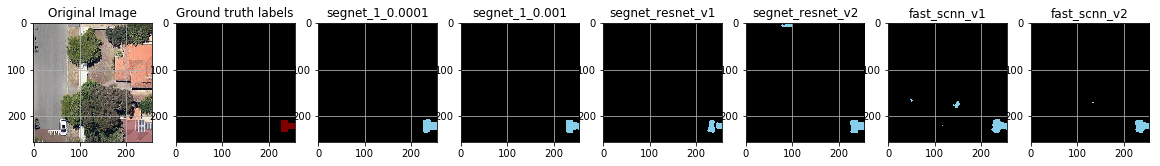

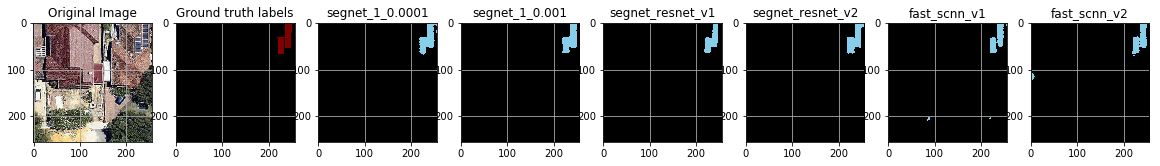

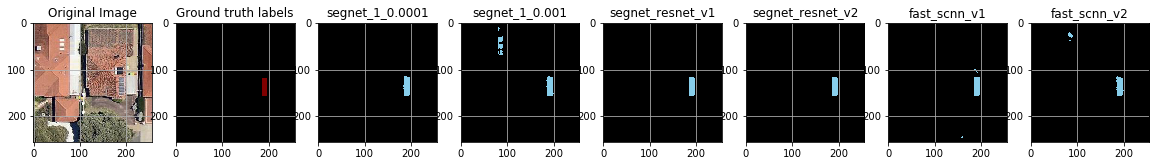

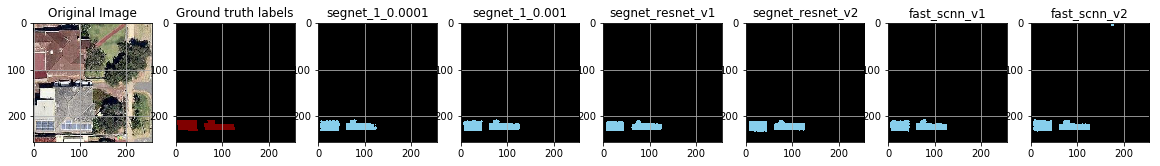

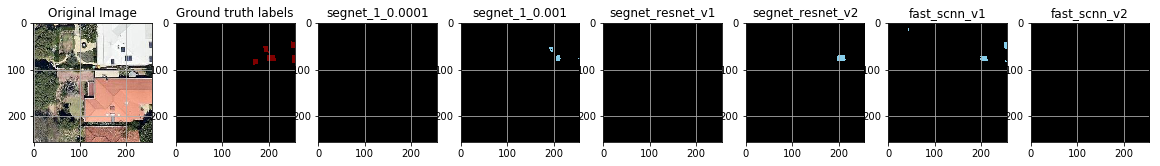

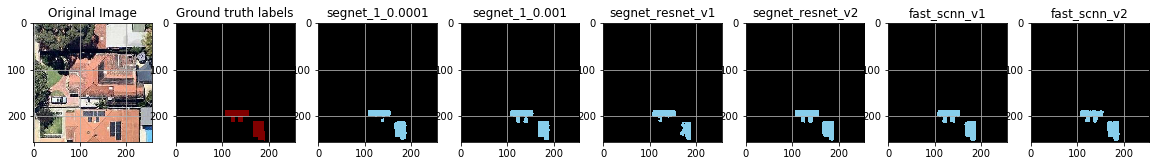

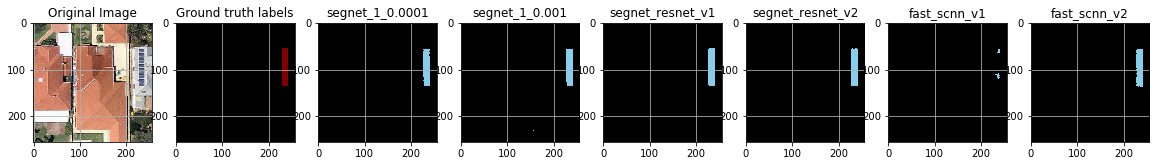

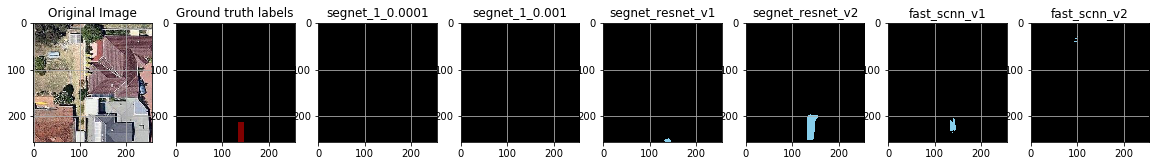

In [6]:
flag=4
testing_gen = prepare_data.test_data_generator(batch_size=16, seed=53)
while(flag>0):
    flag=flag-1
    batch_img, batch_mask= next(testing_gen)
    pred_all_1 = model_1.predict(batch_img)
    pred_all_2 = model_2.predict(batch_img)
    pred_all_3 = model_3.predict(batch_img)
    pred_all_4 = model_4.predict(batch_img)
    pred_all_5 = model_5.predict(batch_img)
    pred_all_6 = model_6.predict(batch_img)
    np.shape(pred_all_1)

    for i in range(0, np.shape(pred_all_1)[0]):
        fig = plt.figure(figsize=(20, 8))

        ax1 = fig.add_subplot(1, 8, 1)
        ax1.imshow(batch_img[i])
        ax1.title.set_text('Original Image')
        ax1.grid(b=None)

        ax2 = fig.add_subplot(1, 8, 2)
        ax2.set_title('Ground truth labels')
        ax2.imshow(prepare_data.onehot_to_rgb(batch_mask[i], prepare_data.id2code))
        ax2.grid(b=None)

        ax3 = fig.add_subplot(1, 8, 3)
        ax3.set_title('segnet_1_0.0001')
        new_color_code={0: (0, 0, 0), 1: (135,206,235)}
        ax3.imshow(prepare_data.onehot_to_rgb(pred_all_1[i], new_color_code))
        ax3.grid(b=None)
        
        ax4 = fig.add_subplot(1, 8, 4)
        ax4.set_title('segnet_1_0.001')
        new_color_code={0: (0, 0, 0), 1: (135,206,235)}
        ax4.imshow(prepare_data.onehot_to_rgb(pred_all_2[i], new_color_code))
        ax4.grid(b=None)
        
        ax5 = fig.add_subplot(1, 8, 5)
        ax5.set_title('segnet_resnet_v1')
        new_color_code={0: (0, 0, 0), 1: (135,206,235)}
        ax5.imshow(prepare_data.onehot_to_rgb(pred_all_3[i], new_color_code))
        ax5.grid(b=None)
        
        ax6 = fig.add_subplot(1, 8, 6)
        ax6.set_title('segnet_resnet_v2')
        new_color_code={0: (0, 0, 0), 1: (135,206,235)}
        ax6.imshow(prepare_data.onehot_to_rgb(pred_all_4[i], new_color_code))
        ax6.grid(b=None)
        
        ax7 = fig.add_subplot(1, 8, 7)
        ax7.set_title('fast_scnn_v1')
        new_color_code={0: (0, 0, 0), 1: (135,206,235)}
        ax7.imshow(prepare_data.onehot_to_rgb(pred_all_5[i], new_color_code))
        ax7.grid(b=None)
        
        ax8 = fig.add_subplot(1, 8, 8)
        ax8.set_title('fast_scnn_v2')
        new_color_code={0: (0, 0, 0), 1: (135,206,235)}
        ax8.imshow(prepare_data.onehot_to_rgb(pred_all_6[i], new_color_code))
        ax8.grid(b=None)
        
        plt.show()